### Instructions

1) Please submit the .ipynb and .pdf file to gradescope

2) Please include your Name and UNI below.

### Name: Eesun Moon
### UNI: em3907

##Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

# Part 1: Neural Network from the scratch
For this part, you are not allowed to use any library other than numpy.

In this part, you will implement the forward pass and backward pass (i.e. the derivates of each
parameter wrt to the loss) with the network image uploaded.

*   The weight matrix for the hidden layer is W1 and has bias b1.
*   The weight matrix for the output layer is W2 and has bias b2.
*   Activation function is sigmoid for both hidden and output layer
*   Loss function is the Mean Squared Error (MSE) loss

Refer to the below dictionary for dimensions for each matrix


In [2]:
np.random.seed(0) # don't change this
weights = {
'W1': np.random.randn(3, 2),
'b1': np.zeros(3),
'W2': np.random.randn(3),
'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [3]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [4]:
#Implement the forward pass - Z2 and Y
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the  hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation

    Z1 = np.dot(X, weights['W1'].T)  + weights['b1']
    H = sigmoid(Z1)

    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

In [5]:
# Implement the backward pass - dLdZ1, dLdW1, dLdb1
# Y_T are the ground truth labels
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]

    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))

    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)

    ones = np.ones((1000))
    dLdb2 = np.dot(ones.T, dLdZ2)
    dLdH = np.dot(dLdZ2.reshape(-1,1), weights['W2'].reshape(-1,1).T)

    # chain rule for backpropogation
    ## dLdZ1: the derivative of the loss L with Z1
    dLdZ1 = np.multiply(dLdH, sigmoid(Z1)*(1-sigmoid(Z1)))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.dot(np.ones((N_points,)), dLdZ1)

    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }

    return gradients, L

In [6]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [7]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([0.02216011, 0.02433097, 0.01797174]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318688}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066]).

You will be graded based on your implementation and outputs for L, W1, W2 b1, and b2

# Part 2: Neural network to classify images: CIFAR-10

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes - airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

The train/test split is 50k/10k.

In [8]:
from tensorflow.keras.datasets import cifar10 #Code to load data, do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()

LABELS = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### 2.1 Plot 50 samples from each class/label from train set on a 10*5 subplot

In [9]:
samples = {label: [] for label in LABELS}

for x, y in zip(x_dev, y_dev):
  label = LABELS[y[0]]
  if len(samples[label]) < 50:
    samples[label].append(x)

    if all(len(sample) == 50 for sample in samples.values()):
      break

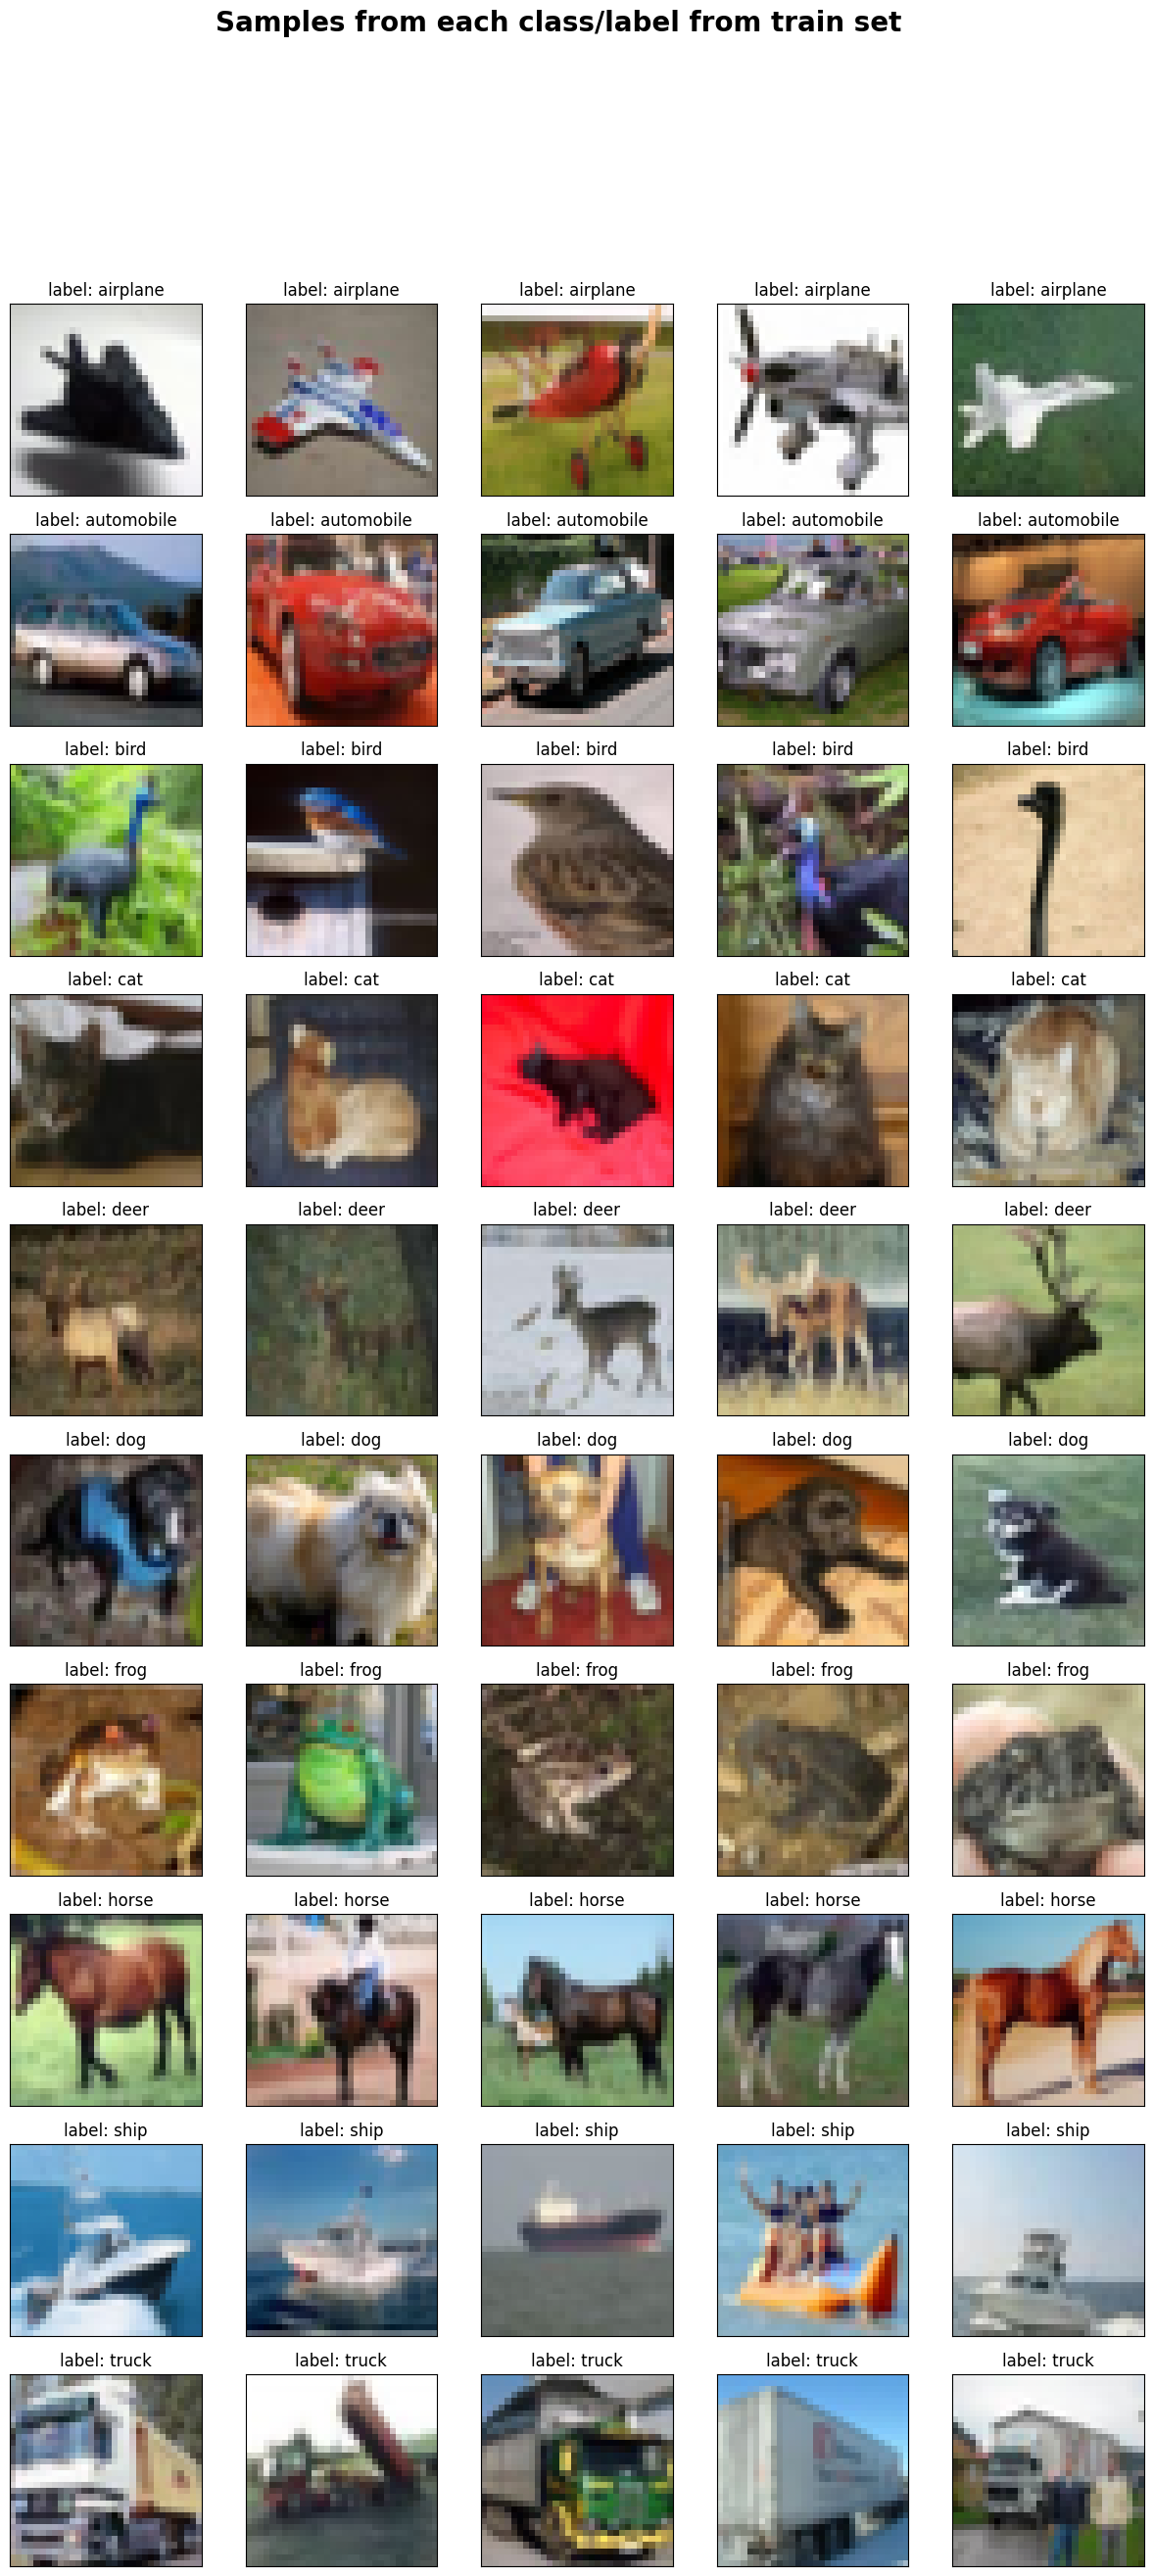

In [10]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize=(15,30))
fig.suptitle("Samples from each class/label from train set", fontsize = 20, fontweight = "bold")

for i, (label, images) in enumerate(samples.items()):
  for j in range(5):
    ax[i, j].imshow(images[j])
    ax[i, j].set_title(f"label: {label}", fontsize=12)
    ax[i, j].get_xaxis().set_visible(False)
    ax[i, j].get_yaxis().set_visible(False)

plt.show()

###2.2 Preparing the dataset for NN

1) Print the shapes -  𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

2) Flatten the images into one-dimensional vectors and again print the shapes of  𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

3) Standardize the development and test sets.

4) One hot encode your labels

5) Train-test split your development set into train and validation sets (80:20 ratio).

In [11]:
# 1) Print the shapes - 𝑥𝑑𝑒𝑣, 𝑦𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡, 𝑦𝑡𝑒𝑠𝑡

print("Shape of x_dev:", x_dev.shape)
print("Shape of y_dev:", y_dev.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_dev: (50000, 32, 32, 3)
Shape of y_dev: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [12]:
# 2) Flatten the images into one-dimensional vectors
#    and again print the shapes of 𝑥𝑑𝑒𝑣, 𝑥𝑡𝑒𝑠𝑡

x_dev_flatten = x_dev.reshape(x_dev.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

print("Shape of x_dev after flatten:", x_dev_flatten.shape)
print("Shape of x_dev after flatten:", x_dev_flatten.shape)

Shape of x_dev after flatten: (50000, 3072)
Shape of x_dev after flatten: (50000, 3072)


In [13]:
# 3) Standardize the development and test sets.
# pixel values range: 0-255

mean = np.mean(x_dev_flatten, axis = 0)
std = np.std(x_dev_flatten, axis = 0)

x_dev_stand = (x_dev_flatten - mean)/std
x_test_stand = (x_test_flatten - mean)/std

In [14]:
# 4) One hot encode your labels
from tensorflow.keras.utils import to_categorical

n = len(LABELS)
y_dev_encod = to_categorical(y_dev, num_classes = n)
y_test_encod = to_categorical(y_test, num_classes = n)

In [15]:
# 5) Train-test split your development set into train and validation sets (80:20 ratio)
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev_stand, y_dev_encod, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (40000, 3072)
Shape of X_val: (10000, 3072)
Shape of y_train: (40000, 10)
Shape of y_val: (10000, 10)


### 2.3 Build the feed forward network with the below specifications

First layer size = 128

hidden layer size = 64

last layer size = Figure this out from the data!

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Dense(128, input_shape=(3072,), activation='relu'), # First Layer
    Dense(64, activation='relu'),                       # Hidden Layer
    Dense(10, activation='softmax')                     # Output Layer
])

###2.4 Print out the model summary. Mention the number of parameters for each layer.

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

###2.5 Do you think the number of parameters is dependent on the image height and width?

In [ ]:
#Your comments here -> below !

Yes, the number of parameters is dependent on the image height and width.

When we flatten the images into one-dimensional vectors, the original 32 x 32 x 3 input data becomes a 3072-dimensional vector. As a result, the input size for the first dense layer is 3072. This input size is determined by the image's height and width, so if the height and width change, the input size for the first dense layer will also change. For this dense layer, the number of parameters is calculated as *input size (3072) x output units (128) + output units (128)*. Therefore, if the input size changes with different image dimensions, the number of parameters in this dense layer will also change accordingly.
<!-- --Images 데이터를 one-dimensional vectors로 Flatten 했을 때, 32 x 32 x 3 size이었던 input data가 3072-dimensional vector로 바뀌게 된다. 따라서 first dense layer의 input size는 3072가 된다. 이 input size는 image의 height와 width로 정해지므로, height와 width가 달라지는 경우 first dense layer의 input size 또한 달라지게 된다. 이 dense layer의 경우 Parameter의 수는 input size (3072) x output unit (128) + output unit (128)로 결정되기 때문에, input size가 height와 width에 따라 달라지면, 이 dense layer의 the number of parameters 또한 달라지게 된다. -->
In contrast, the number of parameters in the subsequent dense layer (including hidden layer and output layer) depends only on the *(output units + bias) of the previous layer and output units of the current layer*. As a result, these layers are not affected by the image's height and width.
<!-- 반면에, 다음에 이어지는 dense layer(hidden layer, output layer)의 parameter 수는 이전 layer의 (output unit+ bias(1))*현재 layer의 output unit이므로 image의 height와 width에 영향을 받지 않는다.  -->
Therefore, **the number of parameters in the first layer is dependent on the image height and width** since it directly affects the size of the flattened input vector.

**Printing out your model's output on first train sample. This will confirm if your dimensions are correctly set up. The sum of this output should equal to 1.**

In [18]:
#modify name of X_train based on your requirement

model.compile()
output = model.predict(X_train[0].reshape(1,-1))

print("Output: {:.2f}".format(sum(output[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step
Output: 1.00


###2.6 Using the right metric and  the right loss function, with Adam as the optimizer, train your model for 20 epochs.

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3317 - loss: 2.0060 - val_accuracy: 0.4156 - val_loss: 1.6508
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4499 - loss: 1.5570 - val_accuracy: 0.4439 - val_loss: 1.5587
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4900 - loss: 1.4404 - val_accuracy: 0.4687 - val_loss: 1.5009
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5174 - loss: 1.3705 - val_accuracy: 0.4745 - val_loss: 1.5173
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5345 - loss: 1.3142 - val_accuracy: 0.4861 - val_loss: 1.4583
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5591 - loss: 1.2615 - val_accuracy: 0.4808 - val_loss: 1.5036
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5712 - loss: 1.2176 - val_accuracy: 0.4866 - val_loss: 1.5045
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5856 - loss: 1.1796 - 

###2.7 Plot the training curves as described below

#### 2.7.1 Display the train vs validation loss over each epoch


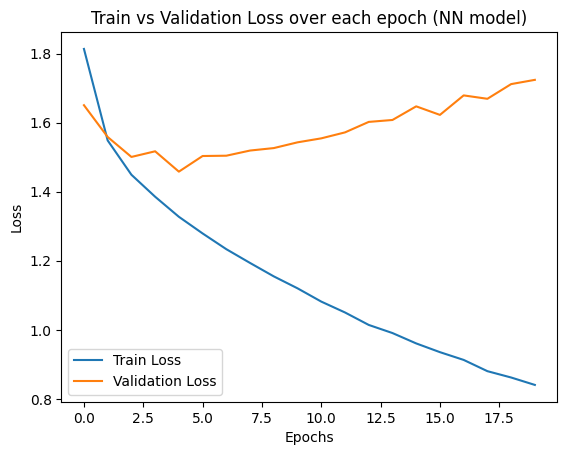

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss over each epoch (NN model)')
plt.legend()
plt.show()

#### 2.7.2 Display the train vs validation accuracy over each epoch

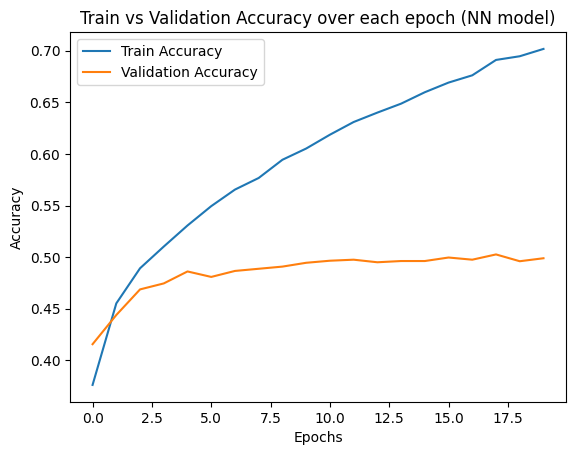

In [21]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy over each epoch (NN model)')
plt.legend()
plt.show()

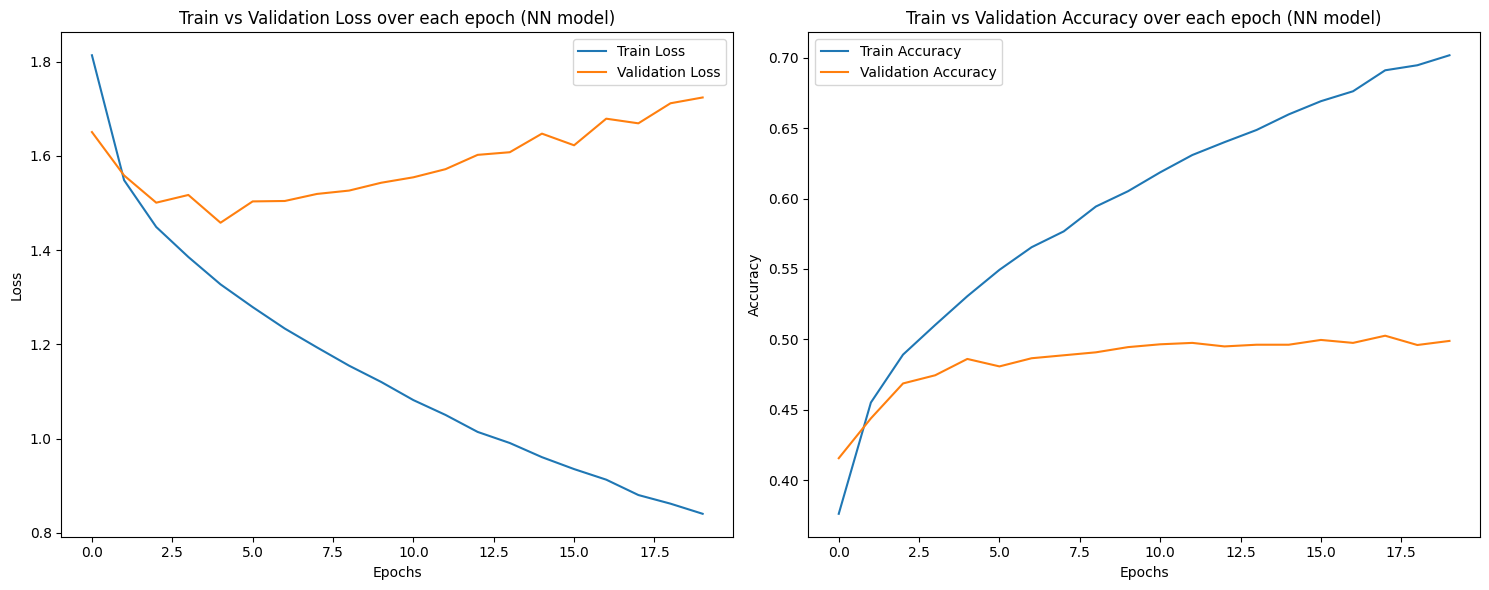

In [22]:
# Display both the loss and accuracy plots at once

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train vs Validation Loss over each epoch (NN model)')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train vs Validation Accuracy over each epoch (NN model)')
ax2.legend()

plt.tight_layout()
plt.show()

### 2.8 Finally, report the metric chosen on test set

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_stand, y_test_encod)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4955 - loss: 1.7080
Test Loss: 1.7147164344787598
Test Accuracy: 0.4982999861240387


### 2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P). (Make sure you predict the class with the improved model)

In [24]:
y_pred = model.predict(x_test_stand)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encod, axis=1)

print(y_pred_classes[:50])
print(y_true_classes[:50])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3 8 0 8 6 6 3 6 5 1 0 1 5 7 1 3 5 6 8 6 4 0 0 9 4 5 6 0 9 4 6 4 2 5 9 1 7
 9 9 5 0 6 3 6 0 9 5 8 7 4]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6 6 5 4 5 9 2 4
 1 9 5 4 6 5 6 0 9 3 9 7 6]


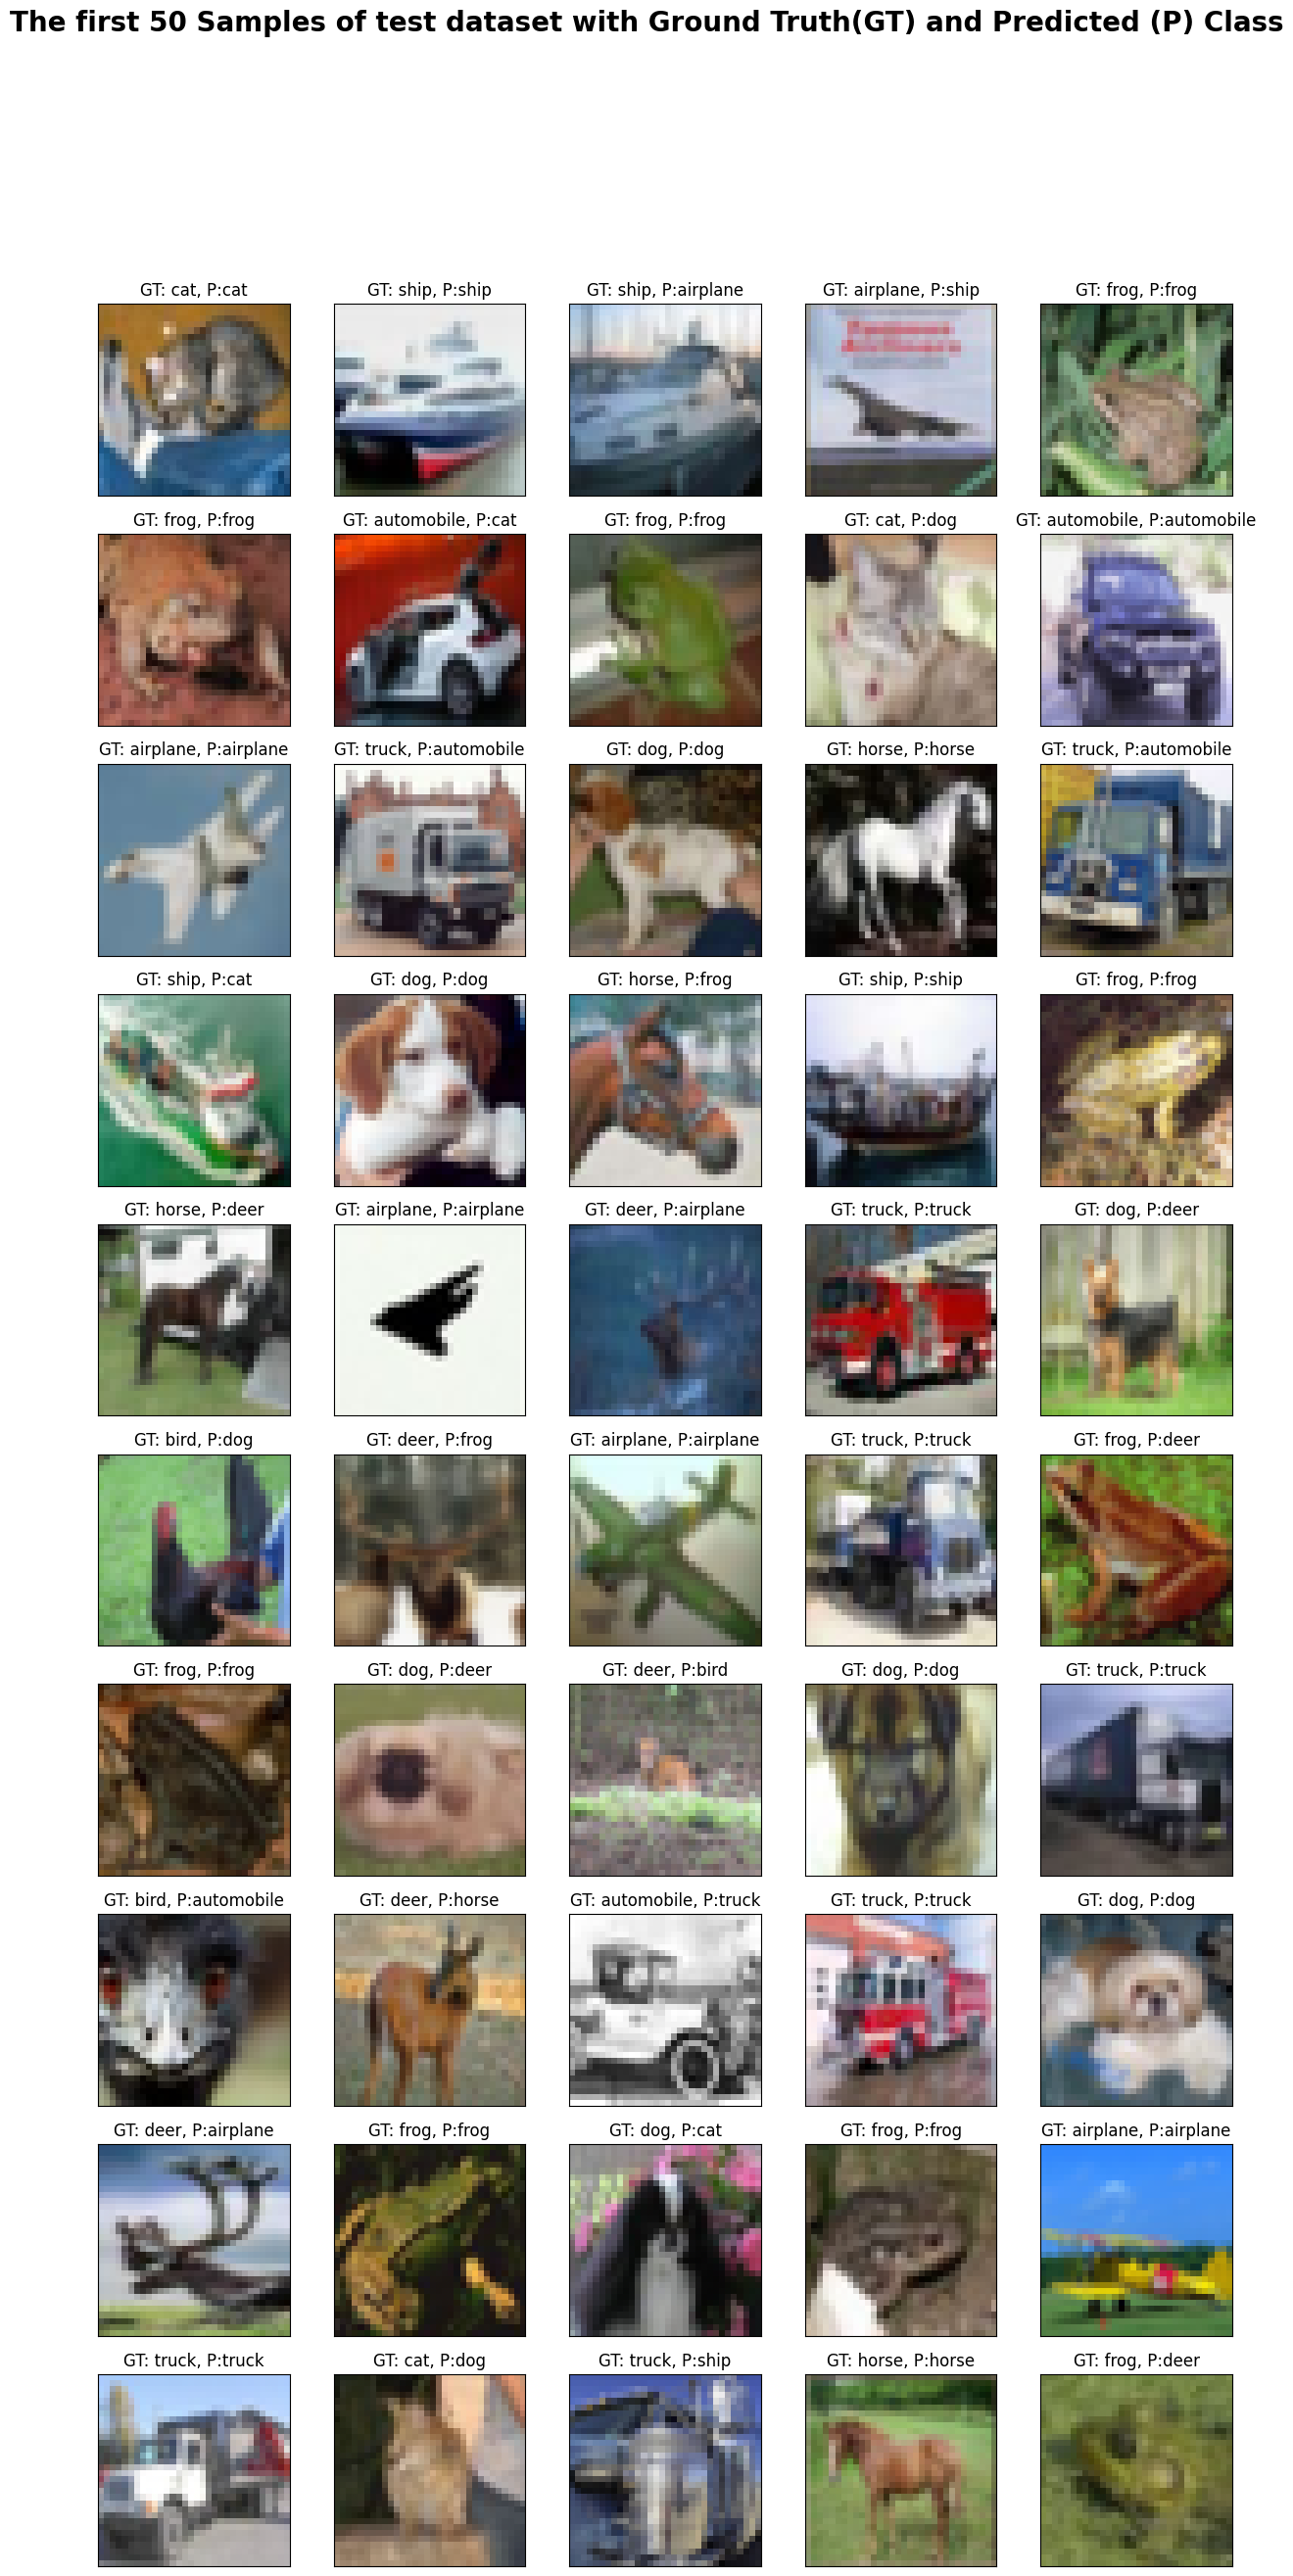

In [25]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize=(15,30))
fig.suptitle("The first 50 Samples of test dataset with Ground Truth(GT) and Predicted (P) Class", fontsize = 20, fontweight = "bold")

for i in range(50):
  row, col = divmod(i, 5)
  ax[row, col].imshow(x_test[i])
  y_pred_label, y_true_label = LABELS[y_pred_classes[i]], LABELS[y_true_classes[i]]
  ax[row, col].set_title("GT: {}, P:{}".format(y_true_label, y_pred_label), fontsize=12)
  ax[row, col].get_xaxis().set_visible(False)
  ax[row, col].get_yaxis().set_visible(False)

plt.show()

# Part 3 - Convolutional Neural Networks

In this part of the homework, we will build and train a classical convolutional neural network on the CIFAR Dataset

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [27]:
#Code to load the dataset - Do not change
(x_dev, y_dev), (x_test, y_test) = cifar10.load_data()
print("x_dev: {},y_dev: {},x_test: {},y_test: {}".format(x_dev.shape, y_dev.shape, x_test.shape, y_test.shape))

x_dev, x_test = x_dev.astype('float32'), x_test.astype('float32')
x_dev = x_dev/255.0
x_test = x_test/255.0


from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x_dev, y_dev,test_size = 0.2, random_state = 42)

x_dev: (50000, 32, 32, 3),y_dev: (50000, 1),x_test: (10000, 32, 32, 3),y_test: (10000, 1)


### 3.1 We will be implementing one of the first CNN models put forward by Yann LeCunn, which is commonly referred to as LeNet-5. The network has the following layers:

1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation

2) Maxpooling layer of 2x2

3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation

4) Maxpooling layer of 2x2

5) Flatten the convolution output to feed it into fully connected layers

6) A fully connected layer with 120 units, ReLU activation

7) A fully connected layer with 84 units, ReLU activation

8) The output layer where each unit respresents the probability of image being in that category. What activation function should you use in this layer? (You should know this)

In [28]:
cnn_model = Sequential([
    # 1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation
    Conv2D(6, kernel_size=(5,5),strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)),
    # 2) Maxpooling layer of 2x2
    MaxPool2D(pool_size=(2,2)),
    # 3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation
    Conv2D(16, kernel_size=(5,5), padding="valid", activation="relu"),
    # 4) Maxpooling layer of 2x2
    MaxPool2D(pool_size=(2,2)),
    # 5) Flatten the convolution output to feed it into fully connected layers
    Flatten(),
    # 6) A fully connected layer with 120 units, ReLU activation
    Dense(120, activation='relu'),
    # 7) A fully connected layer with 84 units, ReLU activation
    Dense(84, activation='relu'),
    # 8) The output layer where each unit respresents the probability of image being in that category.
    Dense(10, activation='softmax')
])

For the output layer, we should use the **softmax** activation function, which transforms the raw output values into probabilities for each class. Thus, this function allows the model to predict the category with the highest probability as the final output.


### 3.2 Report the model summary

In [29]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

### 3.3 Model Training

1) Train the model for 20 epochs. In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

2) Plot separate plots for:

* displaying train vs validation loss over each epoch
* displaying train vs validation accuracy over each epoch

3) Report the model performance on the test set. Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

In [30]:
# 1) Train the cnn_ for 20 epochs.
#    In each epoch, record the loss and metric (chosen in part 3) scores for both train and validation sets.

batch_sizes = [32, 64]
optimizers = ['adam', 'sgd', 'rmsprop']

best_batch_size = None
best_optimizer = None
best_val_acc = 0
best_history = None

for batch_size in batch_sizes:
  for optimizer in optimizers:
    print("Batch Size is {}, Optimizer is {}".format(batch_size, optimizer))

    cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = cnn_model.fit(X_train, y_train,
                        epochs=20, batch_size=batch_size,
                        validation_data=(X_val, y_val),
                        verbose=0)

    max_val_acc = max(history.history['val_accuracy'])

    if max_val_acc > best_val_acc:
      best_batch_size = batch_size
      best_optimizer = optimizer
      best_val_acc = max_val_acc
      best_history = history


print("Best Batch Size:", best_batch_size)
print("Best Optimizer:", best_optimizer)
print("Best Validation Accuracy:", best_val_acc)

Batch Size is 32, Optimizer is adam
Batch Size is 32, Optimizer is sgd
Batch Size is 32, Optimizer is rmsprop
Batch Size is 64, Optimizer is adam
Batch Size is 64, Optimizer is sgd
Batch Size is 64, Optimizer is rmsprop
Best Batch Size: 32
Best Optimizer: adam
Best Validation Accuracy: 0.6459000110626221


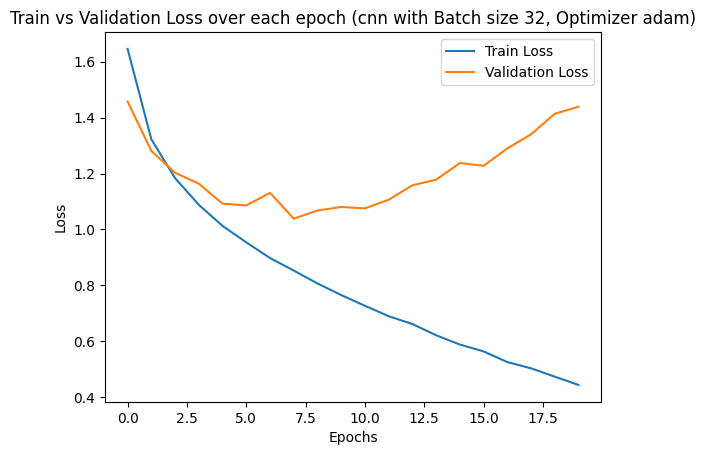

In [31]:
# 2) Plot separate plots for:
# displaying train vs validation loss over each epoch

plt.plot(best_history.history['loss'], label='Train Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss over each epoch (cnn with Batch size {}, Optimizer {})'.format(best_batch_size, best_optimizer))
plt.legend()
plt.show()

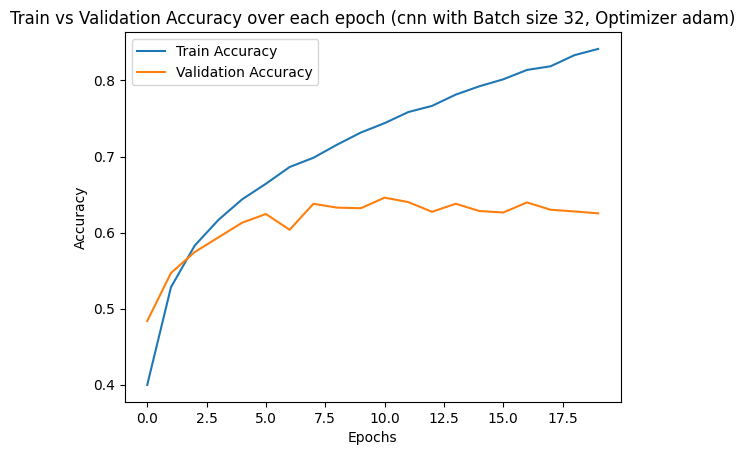

In [32]:
# 2) Plot separate plots for:
# displaying train vs validation accuracy over each epoch

plt.plot(best_history.history['accuracy'], label='Train Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy over each epoch (cnn with Batch size {}, Optimizer {})'.format(best_batch_size, best_optimizer))
plt.legend()
plt.show()

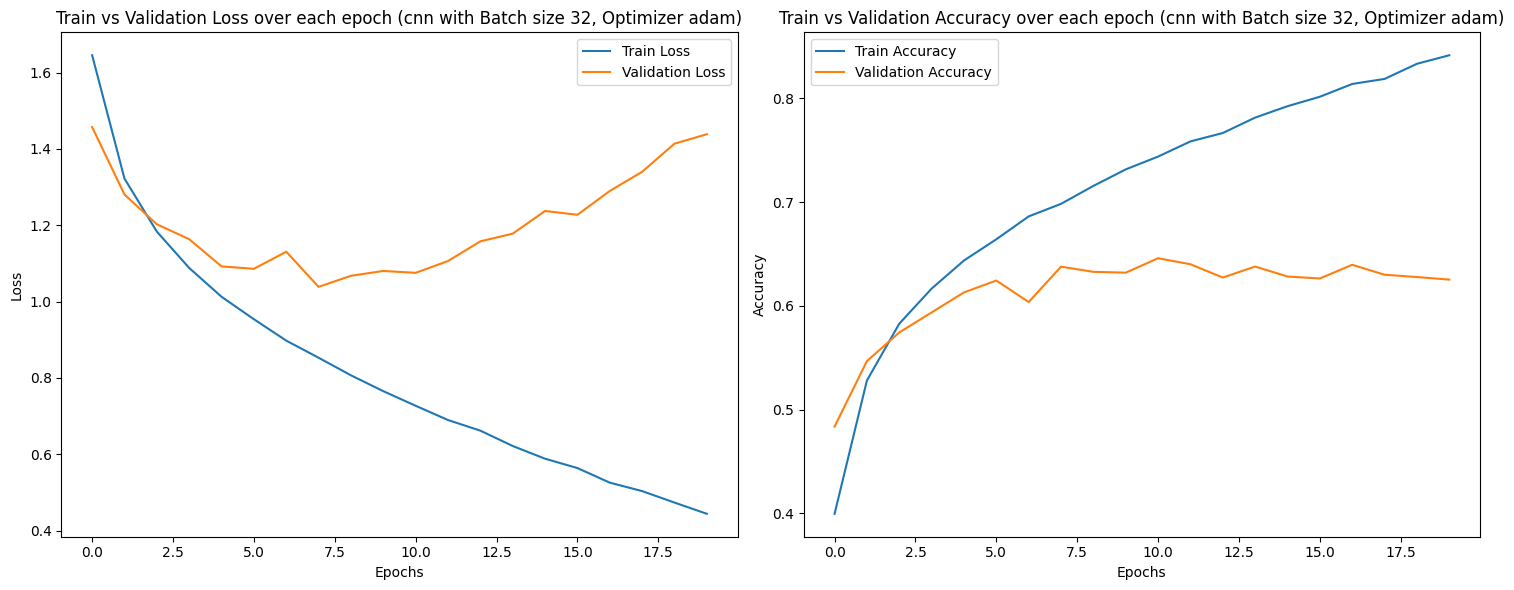

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(best_history.history['loss'], label='Train Loss')
ax1.plot(best_history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train vs Validation Loss over each epoch (cnn with Batch size {}, Optimizer {})'.format(best_batch_size, best_optimizer))
ax1.legend()

ax2.plot(best_history.history['accuracy'], label='Train Accuracy')
ax2.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train vs Validation Accuracy over each epoch (cnn with Batch size {}, Optimizer {})'.format(best_batch_size, best_optimizer))
ax2.legend()

plt.tight_layout()
plt.show()

In [34]:
# 3) Report the model performance on the test set.
# Feel free to tune the hyperparameters such as batch size and optimizers to achieve better performance.

test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print('Model(Batch Size = {}, Optimizer = {})'.format(best_batch_size, best_optimizer))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5942 - loss: 7.0890
Model(Batch Size = 32, Optimizer = adam)
Test Loss: 7.110476493835449
Test Accuracy: 0.595300018787384


### 3.4 Overfitting
1) To overcome overfitting, we will train the network again with dropout this time. For hidden layers use dropout probability of 0.3. Train the model again for 20 epochs. Report model performance on test set.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

2) This time, let's apply a batch normalization after every hidden layer, train the model for 20 epochs, report model performance on test set as above.

Plot separate plots for:

*   displaying train vs validation loss over each epoch
*   displaying train vs validation accuracy over each epoch

3) Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

#### 3.4.1 Dropout

In [45]:
# For hidden layers use dropout probability of 0.3.
# Train the model again for 20 epochs. Report model performance on test set.

from tensorflow.keras.layers import Dropout

cnn_model_dropout = Sequential([
    # 1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation
    Conv2D(6, kernel_size=(5,5),strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)),
    # 2) Maxpooling layer of 2x2
    MaxPool2D(pool_size=(2,2)),
    # +) Dropout probability of 0.3
    Dropout(0.3),
    # 3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation
    Conv2D(16, kernel_size=(5,5), padding="valid", activation="relu"),
    # 4) Maxpooling layer of 2x2
    MaxPool2D(pool_size=(2,2)),
    # +) Dropout probability of 0.3
    Dropout(0.3),
    # 5) Flatten the convolution output to feed it into fully connected layers
    Flatten(),
    # 6) A fully connected layer with 120 units, ReLU activation
    Dense(120, activation='relu'),
    # +) Dropout probability of 0.3
    Dropout(0.3),
    # 7) A fully connected layer with 84 units, ReLU activation
    Dense(84, activation='relu'),
    # +) Dropout probability of 0.3
    Dropout(0.3),
    # 8) The output layer where each unit respresents the probability of image being in that category.
    Dense(10, activation='softmax')
])

print(cnn_model_dropout.summary())

cnn_model_dropout.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
history = cnn_model_dropout.fit(X_train, y_train,
                        epochs=20, batch_size=32,
                        validation_data=(X_val, y_val))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2269 - loss: 2.0399 - val_accuracy: 0.4283 - val_loss: 1.5755
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4074 - loss: 1.6199 - val_accuracy: 0.4885 - val_loss: 1.4171
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4473 - loss: 1.5166 - val_accuracy: 0.4932 - val_loss: 1.3762
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4662 - loss: 1.4652 - val_accuracy: 0.5231 - val_loss: 1.3185
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4913 - loss: 1.4119 - val_accuracy: 0.5323 - val_loss: 1.2818
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5013 - loss: 1.3803 - val_accuracy: 0.5502 - val_loss: 1.2537
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5077 - loss: 1.3673 - val_accuracy: 0.5704 - val_loss: 1.2079
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5207 - loss: 1.33

In [46]:
test_loss, test_accuracy = cnn_model_dropout.evaluate(x_test, y_test)
print('Model with dropout')
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6267 - loss: 1.0722
Model with dropout
Test Loss: 1.079288125038147
Test Accuracy: 0.6207000017166138


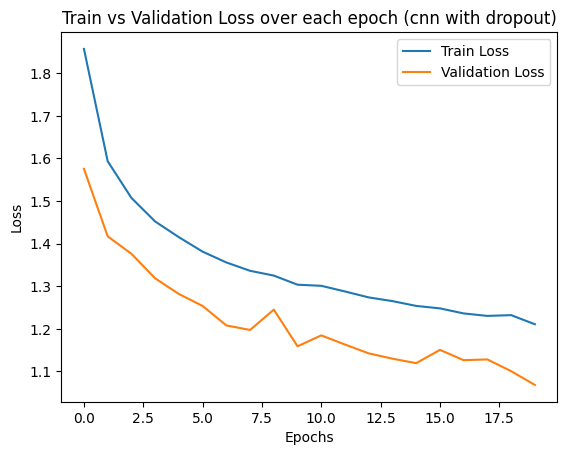

In [47]:
# Plot separate plots for: displaying train vs validation loss over each epoch

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss over each epoch (cnn with dropout)')
plt.legend()
plt.show()

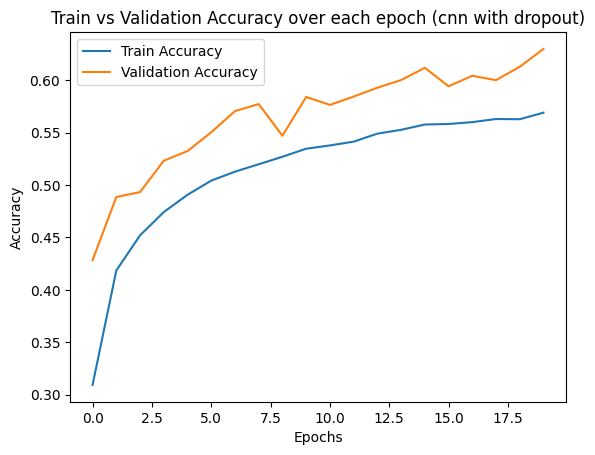

In [48]:
# Plot separate plots for: displaying train vs validation accuracy over each epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy over each epoch (cnn with dropout)')
plt.legend()
plt.show()

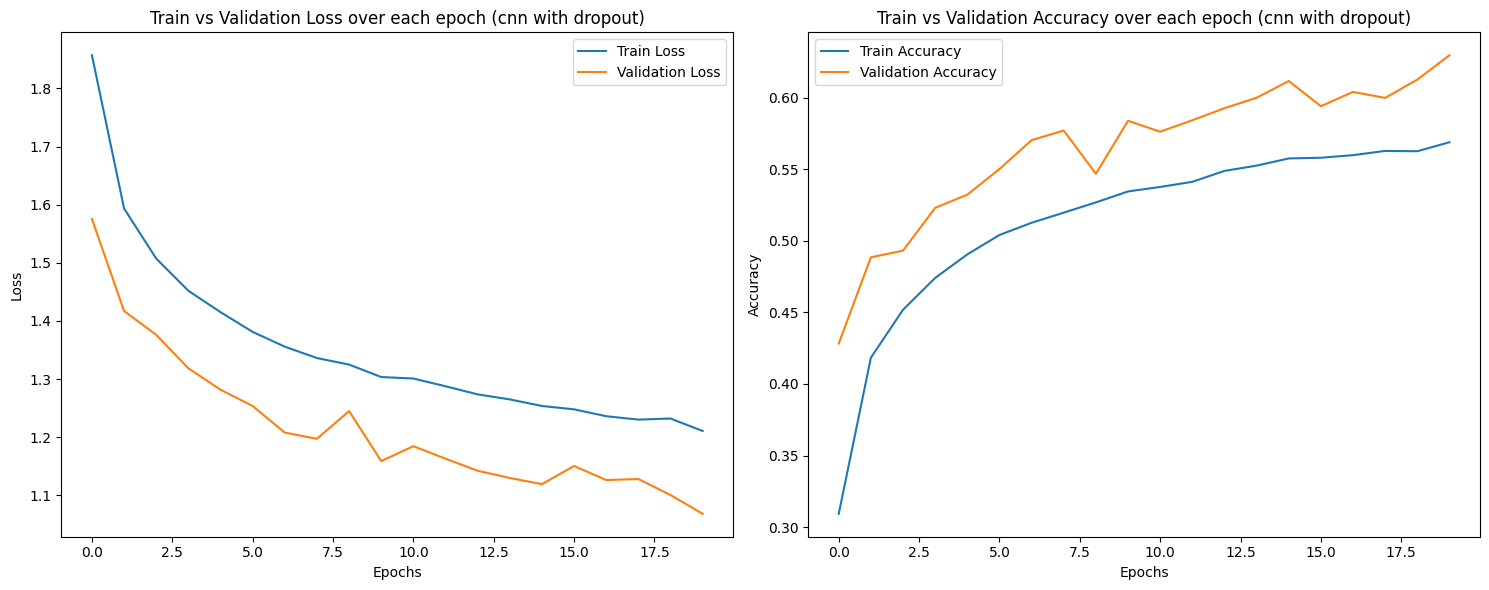

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train vs Validation Loss over each epoch (cnn with dropout)')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train vs Validation Accuracy over each epoch (cnn with dropout)')
ax2.legend()

plt.tight_layout()
plt.show()

#### 3.4.2 Batch Normalization

In [40]:
# let's apply a batch normalization after every hidden layer
from tensorflow.keras.layers import BatchNormalization

cnn_model_bn = Sequential([
    # 1) 2D convolutional layer with 6 filters, 5x5 kernel, stride of 1 and padded to yield the same size as input, ReLU activation
    Conv2D(6, kernel_size=(5,5),strides=(1,1), padding="same", activation="relu", input_shape=(32,32,3)),
    BatchNormalization(),
    # 2) Maxpooling layer of 2x2
    MaxPool2D(pool_size=(2,2)),
    # 3) 2D convolutional layer with 16 filters, 5x5 kernel, 0 padding, ReLU activation
    Conv2D(16, kernel_size=(5,5), padding="valid", activation="relu"),
    BatchNormalization(),
    # 4) Maxpooling layer of 2x2
    MaxPool2D(pool_size=(2,2)),
    # 5) Flatten the convolution output to feed it into fully connected layers
    Flatten(),
    # 6) A fully connected layer with 120 units, ReLU activation
    Dense(120, activation='relu'),
    BatchNormalization(),
    # 7) A fully connected layer with 84 units, ReLU activation
    Dense(84, activation='relu'),
    BatchNormalization(),
    # 8) The output layer where each unit respresents the probability of image being in that category.
    Dense(10, activation='softmax')
])

print(cnn_model_bn.summary())

cnn_model_bn.compile(optimizer='adam',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])
history = cnn_model_bn.fit(X_train, y_train,
                        epochs=20, batch_size=32,
                        validation_data=(X_val, y_val))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 6)           │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 120)                 │             480 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 84)                  │             336 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,030 (328.24 KB)

 Trainable params: 83,578 (326.48 KB)

 Non-trainable params: 452 (1.77 KB)

None
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.3763 - loss: 1.7716 - val_accuracy: 0.4865 - val_loss: 1.4330
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5378 - loss: 1.2933 - val_accuracy: 0.4927 - val_loss: 1.5568
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5937 - loss: 1.1486 - val_accuracy: 0.4931 - val_loss: 1.5431
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6325 - loss: 1.0454 - val_accuracy: 0.6231 - val_loss: 1.0735
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6593 - loss: 0.9679 - val_accuracy: 0.6255 - val_loss: 1.0699
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6853 - loss: 0.8994 - val_accuracy: 0.5880 - val_loss: 1.2040
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7075 - loss: 0.8428 - val_accuracy: 0.6112 - val_loss: 1.1259
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7200 - loss: 0.7

In [41]:
test_loss, test_accuracy = cnn_model_bn.evaluate(x_test, y_test)
print('Model with Batch Normalization'.format(best_batch_size, best_optimizer))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6338 - loss: 1.2789
Model with Batch Normalization
Test Loss: 1.290263295173645
Test Accuracy: 0.6288999915122986


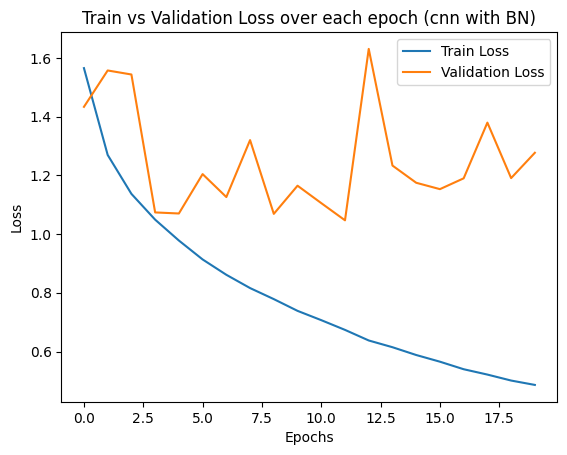

In [42]:
# Plot separate plots for: displaying train vs validation loss over each epoch

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss over each epoch (cnn with BN)')
plt.legend()
plt.show()

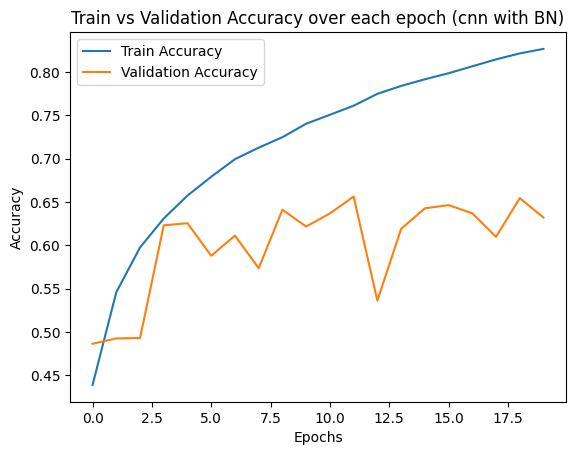

In [43]:
# Plot separate plots for: displaying train vs validation accuracy over each epoch

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy over each epoch (cnn with BN)')
plt.legend()
plt.show()

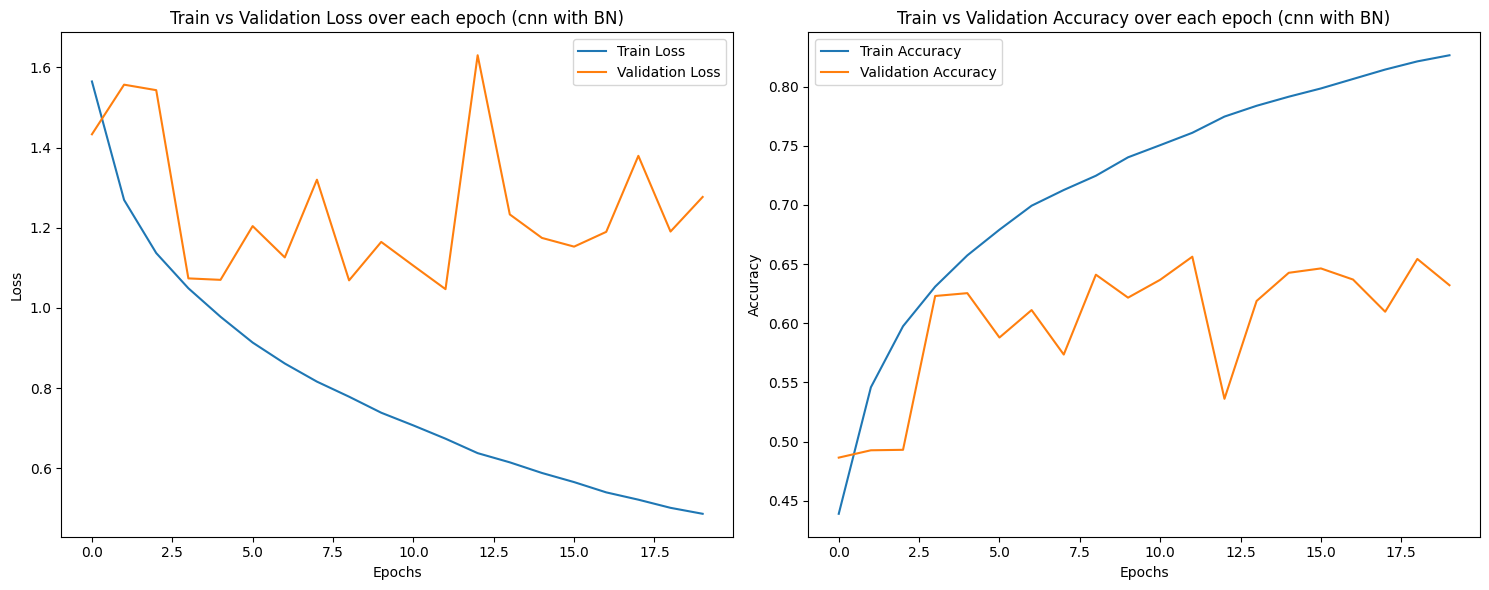

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Train vs Validation Loss over each epoch (cnn with BN)')
ax1.legend()

ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Train vs Validation Accuracy over each epoch (cnn with BN)')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Your comments here -> below!

**Question**: Compare batch normalization technique with the original model and with dropout, which technique do you think helps with overfitting better?

**Answer**:

For the original model, the test loss is 7.11, and its test accuracy is 59.53%. This model shows the highest test loss and lowest test accuracy among the three configurations, indicating that it struggles to generalize to unseen data without any regularization techniques.

In contrast, with dropout, the model achieves a significant lower test loss of 1.08 and the test accuracy is 62.07%. The training and validation accuracy plots show a steady and stable trend across epochs, with minimal fluctuations in validation accuracy, suggesting that dropout effectively controls overfitting. Although its test accuracy is slightly lower than that of the batch normalization (BN) model, the dropout model's stability in its validation accuracy across epochs implies that it is more effective at preventing overfitting.

The BN model achieves the test loss of 1.29 and the test accuracy of 62.89%, which represents an improvement over the original model. However, the training and validation plots shows noticeable fluctuations in the validation accuracy and loss despite the use of batch normalization as the regularization strategy. This instability indicates that the BN model may still face challenges in consistently generalizing to new data, despite achieving a slightly higher test accuracy than the dropout model.

Therefore, **dropout is the most effective technique for addressing overfitting in this case**, as proven by its lower test loss and more stable validation performance.